In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [104]:
# Corporate Design
plt.rc('font', size=14)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["font.family"] = "Arial"
cmap = pltc.LinearSegmentedColormap.from_list("", ["#01353B", "#8AE3ED"])
custom_colors = ["#e41a1c", "#9467bd", "#ff7f00", "#bcbd22", "#f781bf", "#e15759", "#b25f30", "#af7aa1", "#7f7f7f", "#8c564b", "#31b831", "#ff9da7"]
color = "#006871"

In [105]:
# Load data
df = pd.read_csv("data/topic_large_categories.csv", delimiter=";")
df.columns = ["topic", "share", "category", "year"]

In [106]:
df["category_cleaned"] = ["political discussion" if "political discussion" in i else i for i in df.category]
df["category_cleaned"] = ["political action" if "political action" in i else i for i in df.category_cleaned]
df["category_cleaned"] = ["skepticism" if "skepticism" in i else i for i in df.category_cleaned]
df["category_cleaned"] = ["scientific discussion" if "scientific discussion" in i else i for i in df.category_cleaned]

# Group rest 
classes = ['general', 'individual responsibility', 'political action',
       'political discussion', 'scientific discussion', 'skepticism']
df["category_cleaned"] = ["general" if i not in classes else i for i in df.category_cleaned]

In [107]:
df.head(10)

,topic,share,category,year,category_cleaned
0,0_people_just_climate_global,43.43,general,2010,general
1,1_skeptics_skepticism_skeptic_denial,0.88,skepticism,2010,skepticism
2,2_gore_al_people_global,0.82,skepticism,2010,skepticism
3,3_population_overpopulation_children_people,0.76,political discussion (also partly on individua...,2010,political discussion
4,4_models_model_climate_predictions,0.73,scientific discussion/education/explanations,2010,scientific discussion
5,0_people_just_like_climate,35.73,general,2011,general
6,1_meat_food_animals_eat,1.30,scientific discussion/education/explanations w...,2011,scientific discussion
7,2_religion_god_religious_people,1.23,skepticism,2011,skepticism
8,3_canada_harper_canadian_government,1.18,political actions/event,2011,political action
9,4_hiv_science_aids_mullis,0.82,skepticism,2011,skepticism


In [108]:
np.unique(df.category_cleaned)

array(['general', 'individual responsibility', 'political action',
       'political discussion', 'scientific discussion', 'skepticism'],
      dtype=object)

In [109]:
df.columns

Index(['topic', 'share', 'category', 'year', 'category_cleaned'], dtype='object')

In [212]:
aggr_df = df[~df.category_cleaned.isin(["general", "scientific discussion"])]
aggr_df = aggr_df.groupby(["year", "category_cleaned"]).sum().reset_index()
aggr_df.head(5)

C:\Users\Felix\AppData\Local\Temp\ipykernel_14896\2790288507.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggr_df = aggr_df.groupby(["year", "category_cleaned"]).sum().reset_index()


,year,category_cleaned,share
0,2010,political discussion,0.76
1,2010,skepticism,1.70
2,2011,political action,1.18
3,2011,skepticism,2.05
4,2012,political discussion,0.40


In [ ]:
# TODO try out with different basis (total n, n without large topic categories)
# Maybe assess more topics?
# Try to incorporate sentiment somehow (what is sentiment of topics, how did it change over time?)
# Try about smooth curve https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/

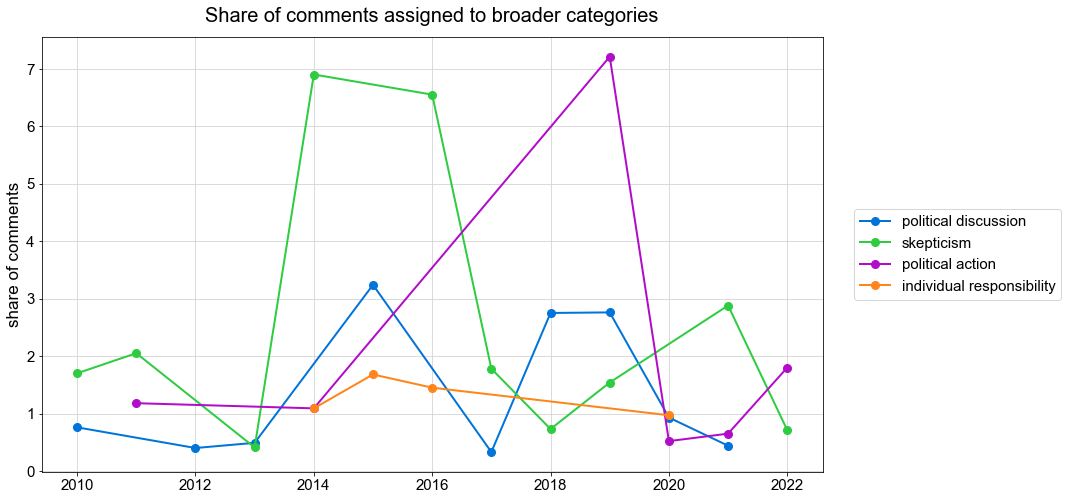

In [213]:
plt.rc('font', size=15)
plt.rcParams["figure.figsize"] = (14,8)
custom_colors = ["#2ECC40", "#FF4136", "#0074D9", "#FF851B"]
custom_colors = ["#0074D9", "#2ECC40", "#B10DC9", "#FF851B"]
# custom_colors = ["#377eb8","#4daf4a","#984ea3","#e41a1c"]
# custom_colors = ["#4e79a7","#f28e2c","#e15759","#76b7b2","#59a14f","#edc949","#af7aa1","#ff9da7","#9c755f","#bab0ab"]

plt.figure(facecolor='white')
for idx, category in enumerate(aggr_df.category_cleaned.unique()):
    sample = aggr_df[aggr_df.category_cleaned == category]
    # print(sample)
    plt.plot(sample.year, sample.share, marker="o", linestyle="-", linewidth=2, markersize=8, label=category, c=custom_colors[idx])
    # break

plt.legend(loc="center left", bbox_to_anchor=(1.03, 0.5))
plt.title("Share of comments assigned to broader categories", size=20, pad=15)
plt.ylabel("share of comments", size=17)
plt.grid(color="lightgrey")
plt.show()